In [1]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # plotting
import numpy as np  # numerical calculations
import seaborn as sn  # also for plotting
import matplotlib.patheffects as path_effects 
import mysql.connector # Import patheffects separately



   <h3>This dataset is based on insights from Most In-Demand Jobs</h3>

[ResumeGenius -published on February 10, 2025](https://resumegenius.com/blog/job-hunting/most-in-demand-jobs) and [Forbes published on February 11, 2025](https://www.forbes.com/sites/bryanrobinson/2025/02/11/high-paying-in-demand-jobs-for-2025-revealed-in-new-study/). These reports highlight the 15 most in-demand jobs for 2025.These reports highlight the 15 most in-demand jobs for 2025, which offer both high market demand and competitive salaries.

However, the original posts lack detailed information on required skills, work experience, job locations, and other specifics. To bridge this gap, I scraped job listings from [Naukri](https://www.naukri.com/), a well-known job search platform, to create a comprehensive dataset.

 # 

<div style="text-align: center;">
    <img src="https://images.pexels.com/photos/15406295/pexels-photo-15406295.jpeg" width="450">
</div>


### Why knowing the exact skills for a profession is important:

1. **Focused Learning**:  
   Learn what matters most, saving time.

2. **Career Readiness**:  
   Be prepared for challenges and expectations.

3. **Competitive Edge**:  
   Stand out in the job market.

4. **Better Opportunities**:  
   Tailor your skills for better job prospects.

5. **Career Growth**:  
   Stay adaptable and open to new opportunities.


In [2]:
df=pd.read_csv(r"C:\Users\misga\Jupter_Notebook\web_scraping\Jobs Scraping\all datas.csv")

In [3]:
df['Experience(Years)']=df['Experience'].str.replace(' Yrs',' ')
df=df.drop('Experience',axis=1)

In [4]:
print(' insert your job  title below')
user_input=input(' ')
user_input=user_input.lower().strip()

 insert your job  title below


  machine learning


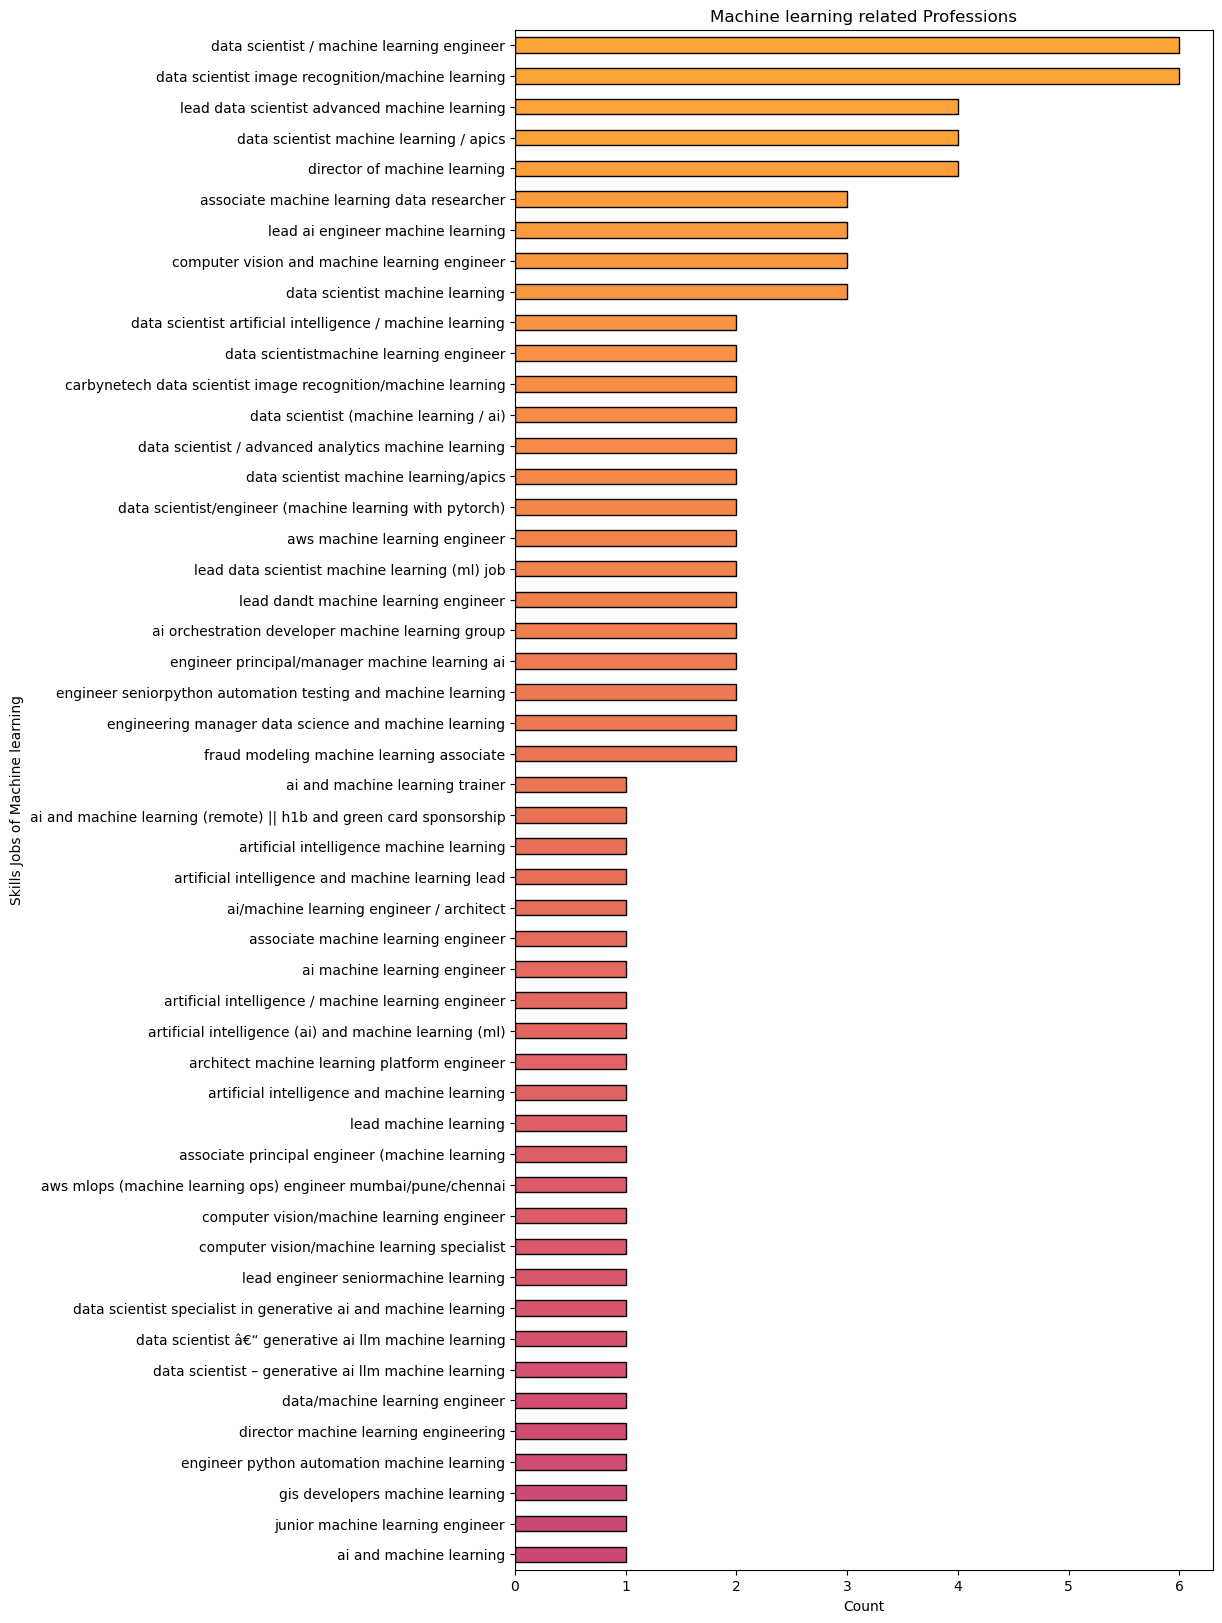

In [5]:
try:
    if not df['Job Title'].str.lower().str.contains(user_input,case=False).any():
        print(f"Try again, '{user_input}' does not exist in this dataset.")
    else:
        user_profession=df[df['Job Title'].str.lower().str.contains(user_input,case=False)].copy(deep=True)
        user_profession['Job Skills']=user_profession['Skills'].str.split(',')
        profession_counts=user_profession['Job Title'].value_counts()
        profession_counts.index=profession_counts.index.str.replace('-','').str.replace(',','').str.replace('.','').str.strip()
        profession_counts.index=profession_counts.index.str.split().str.join(' ')
        profession_counts = profession_counts.groupby(profession_counts.index).sum()
        color_map = plt.colormaps.get_cmap('plasma')
        colors = color_map(np.linspace(0.5, 0.8, 50))
        plt.figure(figsize=(9,20))
        profession_counts[:50].sort_values().plot(kind='barh',color=colors,edgecolor='black')
        plt.xlabel('Count')
        plt.ylabel(f'Skills Jobs of {user_input.capitalize()}')
        plt.title(f'{user_input.capitalize()} related Professions')
        plt.show()   

except Exception as e:
    print(f"Error: {e}")

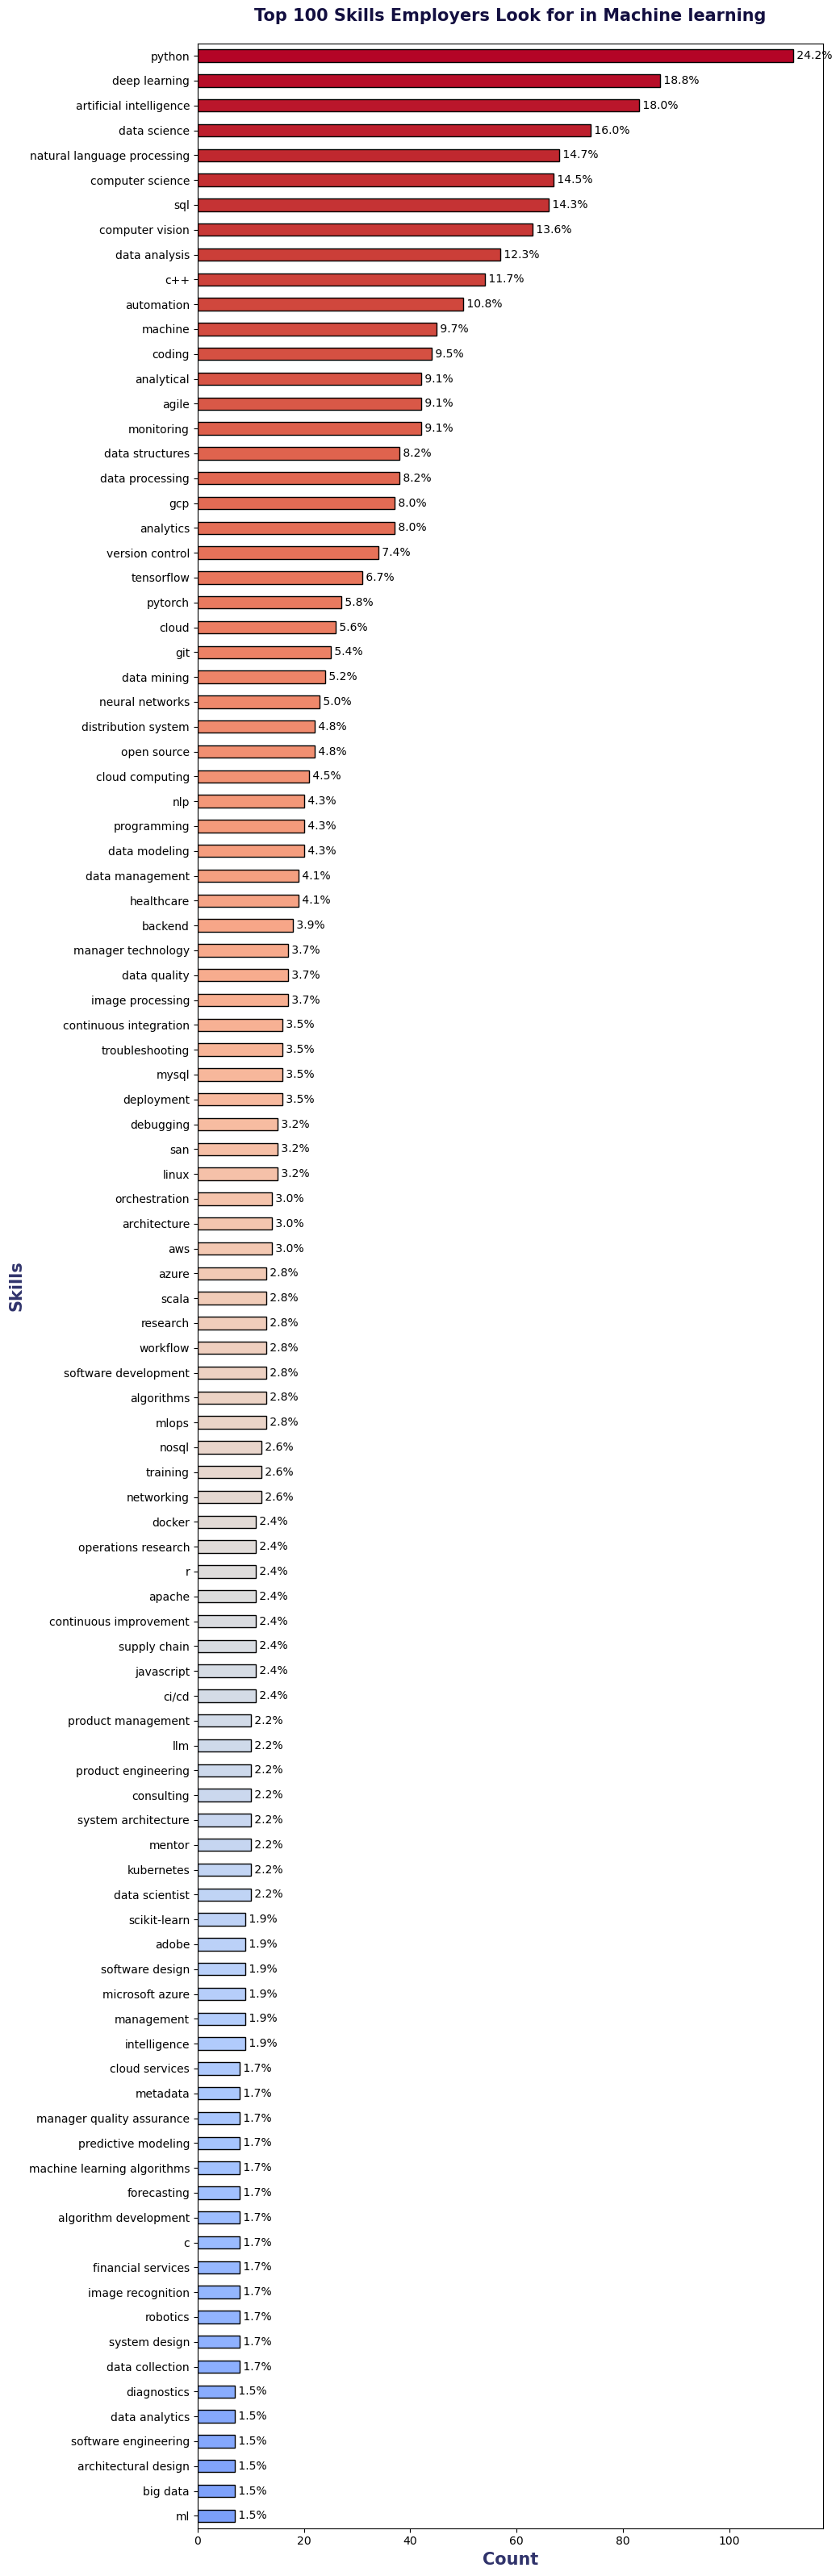

In [6]:


try:
    # Explode the 'Job Skills' column to separate skills into individual rows
    skills_df = user_profession.explode('Job Skills')

    # Normalize text (lowercase and remove whitespace)
    skills_df['Job Skills'] = skills_df['Job Skills'].str.lower().str.strip()

    # Count occurrences of each skill
    skills_df = skills_df['Job Skills'].value_counts()

    # Remove user_input from the skills list
    skills_df.index = skills_df.index.str.strip()
    skills_df = skills_df[skills_df.index != user_input]

    # Define color map
    color_map = plt.colormaps.get_cmap('coolwarm')
    colors = color_map(np.linspace(0.2, 1, min(100, len(skills_df))))

    # Create the figure
    plt.figure(figsize=(10, 40))
    skills_df[:100].sort_values().plot(kind='barh', color=colors, edgecolor='black')

    # Formatting labels and title
    plt.xlabel('Count', fontsize=15, fontweight='bold', color='#30336b')
    plt.ylabel('Skills', fontsize=15, fontweight='bold', color='#30336b')
    plt.title(f'Top 100 Skills Employers Look for in {user_input.capitalize()}',
              fontsize=15, fontweight='bold', color='#130f40', pad=20)

    # Annotate bars with percentages
    total_jobs = len(user_profession)
    for idx, count in enumerate(skills_df[:100].sort_values()):
        plt.annotate(f' {count / total_jobs * 100:.1f}%',
                     xy=(count, idx),
                     va='center')

    plt.show()

except :
    pass


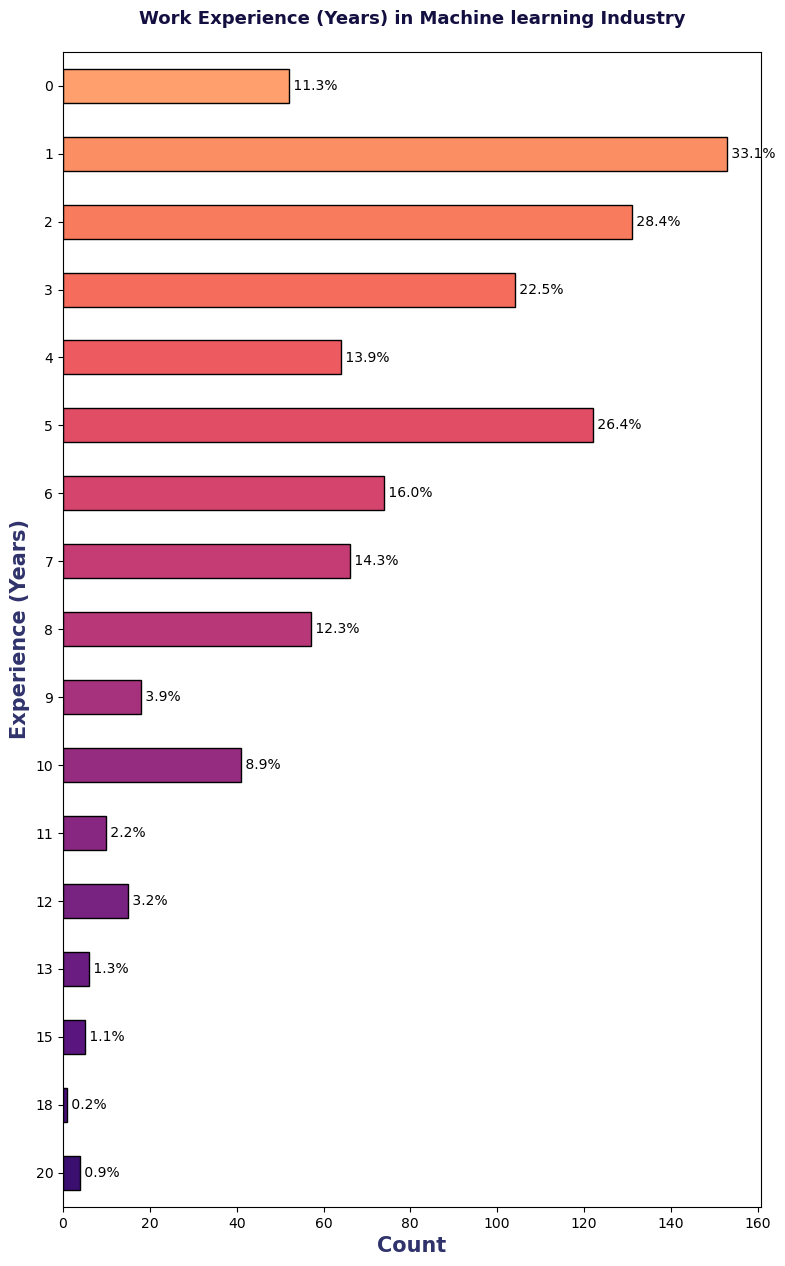

In [7]:


try:
    # Replace '-' with space and split the experience column
    user_profession['Experience(Years)'] = user_profession['Experience(Years)'].str.replace('-', ' ')
    user_profession['Experience(Years)'] = user_profession['Experience(Years)'].str.strip().str.split(' ')

    # Explode the experience column to separate values into individual rows
    experience_df = user_profession.explode('Experience(Years)')

    # Count occurrences of each experience level
    experience_df = experience_df['Experience(Years)'].value_counts()

    # Convert index to integer for sorting
    experience_df.index = experience_df.index.astype('int64')
    experience_df = experience_df.sort_index(ascending=True)

    # Define color map dynamically
    color_map = plt.colormaps.get_cmap('magma')
    colors = color_map(np.linspace(0.2, 0.8, min(50, len(experience_df))))

    # Create figure
    plt.figure(figsize=(9, 15))
    experience_df[:30].sort_index(ascending=False).plot(kind='barh', color=colors, edgecolor='black')

    # Formatting labels and title
    plt.xlabel('Count', fontsize=15, fontweight='bold', color='#30336b')
    plt.ylabel('Experience (Years)', fontsize=15, fontweight='bold', color='#30336b')
    plt.title(f'Work Experience (Years) in {user_input.capitalize()} Industry',
              fontsize=13, fontweight='bold', color='#130f40', pad=20)

    # Annotate bars with percentages
    total_jobs = len(user_profession)
    for idx, count in enumerate(experience_df[:30].sort_index(ascending=False)):
        plt.annotate(f' {count / total_jobs * 100:.1f}%',
                     xy=(count, idx),
                     va='center')

    plt.show()

except:
    pass


<h1>👉 If you found this notebook useful, consider giving it a vote! 😊</h1>